In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
dirname = '/kaggle/input'
train_path = os.path.join(dirname, 'kermany2018/OCT2017 /train')
train_normal_pth = os.path.join(train_path, 'NORMAL')
train_dme_pth = os.path.join(train_path, 'DME')
train_drusen_pth = os.path.join(train_path, 'DRUSEN')
train_cnv_pth = os.path.join(train_path, 'CNV')
    
test_path = os.path.join(dirname, 'kermany2018/OCT2017 /test')
test_normal_pth = os.path.join(test_path, 'NORMAL')
test_dme_pth = os.path.join(test_path, 'DME')
test_drusen_pth = os.path.join(test_path, 'DRUSEN')
test_cnv_pth = os.path.join(test_path, 'CNV')
    
val_path = os.path.join(dirname, 'kermany2018/OCT2017 /val')
val_normal_pth = os.path.join(val_path, 'NORMAL')
val_dme_pth = os.path.join(val_path, 'DME')
val_drusen_pth = os.path.join(val_path, 'DRUSEN')
val_cnv_pth = os.path.join(val_path, 'CNV')

In [3]:
print(test_normal_pth)
print(train_drusen_pth)

/kaggle/input/kermany2018/OCT2017 /test/NORMAL
/kaggle/input/kermany2018/OCT2017 /train/DRUSEN


In [4]:
import matplotlib.pyplot as plt

In [5]:
def plot_imgs(item_dir, num_imgs=4):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(16, 16))
    for idx, img_path in enumerate(item_files):
        plt.subplot(1, 4, idx+1)

        img = plt.imread(img_path)
        plt.imshow(img, cmap='bone')

    plt.tight_layout()


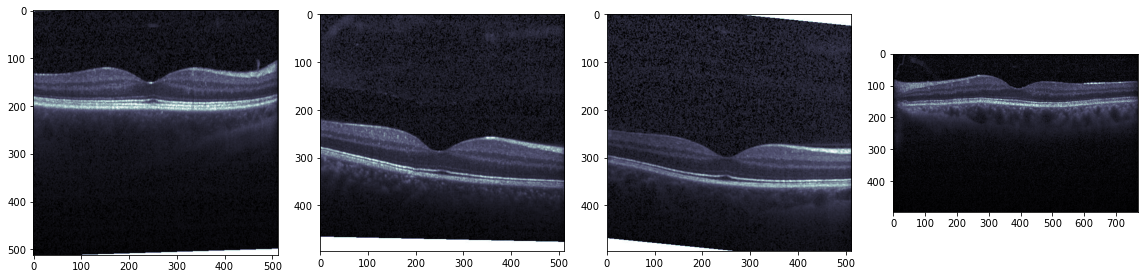

In [6]:
plot_imgs(train_normal_pth)

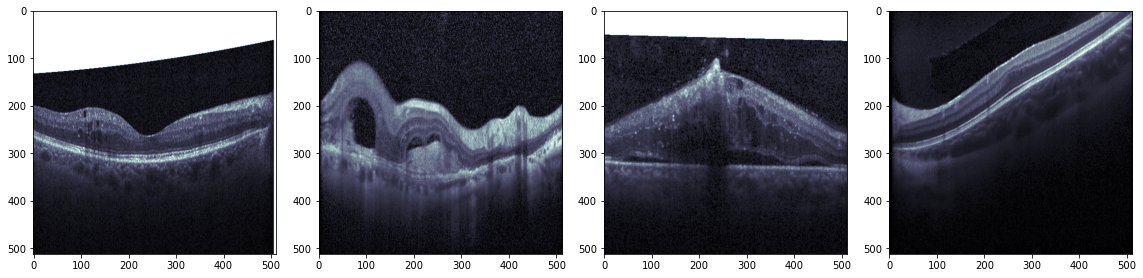

In [7]:
plot_imgs(train_dme_pth)

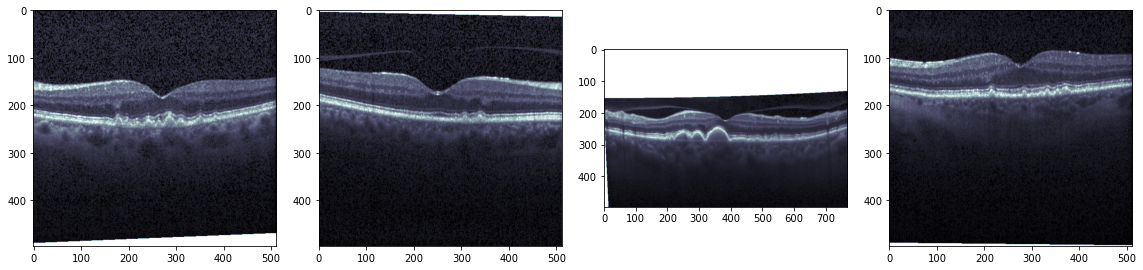

In [8]:
plot_imgs(train_drusen_pth)

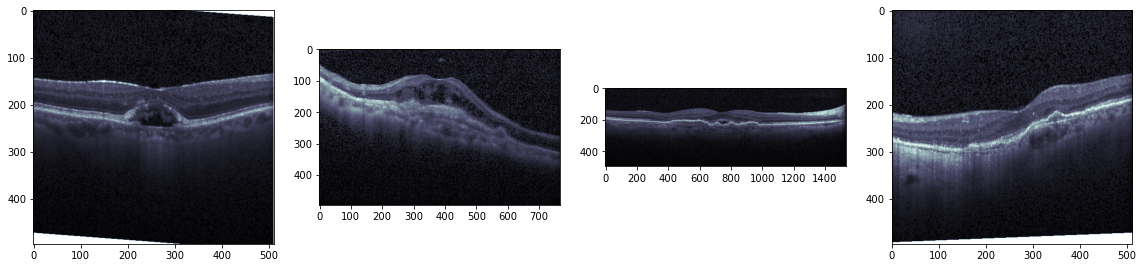

In [9]:
plot_imgs(train_cnv_pth)

In [10]:
input_path = "/kaggle/input/kermany2018/OCT2017 /"

for _set in ['train', 'test', 'val']:
    normal = len(os.listdir(input_path + _set + '/NORMAL'))
    dme = len(os.listdir(input_path + _set + '/DME'))
    drusen = len(os.listdir(input_path + _set + '/DRUSEN'))
    cnv = len(os.listdir(input_path + _set + '/CNV'))
    print('{}, Normal images: {}, DME images: {}, DRUSEN images: {}, CNV images: {}'.format(_set, normal, dme, drusen, cnv))

train, Normal images: 26315, DME images: 11348, DRUSEN images: 8616, CNV images: 37205
test, Normal images: 242, DME images: 242, DRUSEN images: 242, CNV images: 242
val, Normal images: 8, DME images: 8, DRUSEN images: 8, CNV images: 8


In [11]:
datadir = '../input/kermany2018/OCT2017 /'
traindir = datadir + 'train/'
validdir = datadir + 'val/'
testdir = datadir + 'test/'

In [12]:
import glob
from PIL import Image

In [13]:
# Empty lists
categories = []
img_categories = []
n_train = []
n_valid = []
n_test = []
hs = []
ws = []

# Iterate through each category
for d in os.listdir(traindir):
    categories.append(d)

    # Number of each image
    train_imgs = os.listdir(traindir + d)
    valid_imgs = os.listdir(validdir + d)
    test_imgs = os.listdir(testdir + d)
    n_train.append(len(train_imgs))
    n_valid.append(len(valid_imgs))
    n_test.append(len(test_imgs))

    # Find stats for train images
    for i in train_imgs:
        img_categories.append(d)
        img = Image.open(traindir + d + '/' + i)
        img_array = np.array(img)
        # Shape
        hs.append(img_array.shape[0])
        ws.append(img_array.shape[1])

# Dataframe of categories
cat_df = pd.DataFrame({'category': categories,
                       'n_train': n_train,
                       'n_valid': n_valid, 'n_test': n_test}).\
    sort_values('category')

# Dataframe of training images
image_df = pd.DataFrame({
    'category': img_categories,
    'height': hs,
    'width': ws
})

cat_df.sort_values('n_train', ascending=False, inplace=True)
cat_df.head()

,category,n_train,n_valid,n_test
2,CNV,37205,8,242
3,NORMAL,26315,8,242
1,DME,11348,8,242
0,DRUSEN,8616,8,242


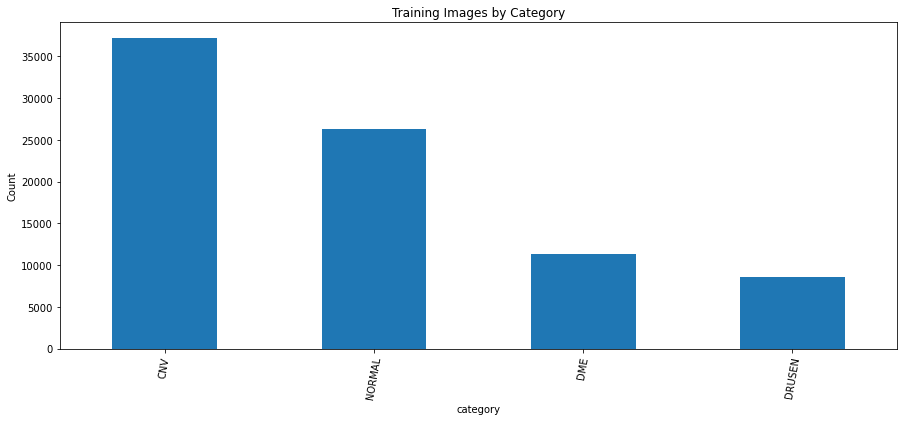

In [14]:
cat_df.set_index('category')['n_train'].plot.bar(figsize=(15, 6))
plt.xticks(rotation=80)
plt.ylabel('Count')
plt.title('Training Images by Category')
plt.show()

In [15]:
img_dsc = image_df.groupby('category').describe()
img_dsc.head()

height                                                           \
            count        mean       std    min    25%    50%    75%    max   
category                                                                     
CNV       37205.0  496.000000  0.000000  496.0  496.0  496.0  496.0  496.0   
DME       11348.0  508.208671  6.803761  496.0  512.0  512.0  512.0  512.0   
DRUSEN     8616.0  496.000000  0.000000  496.0  496.0  496.0  496.0  496.0   
NORMAL    26315.0  500.132700  7.003275  496.0  496.0  496.0  512.0  512.0   

            width                                                              
            count        mean         std    min    25%    50%    75%     max  
category                                                                       
CNV       37205.0  736.372423  338.497157  384.0  512.0  512.0  768.0  1536.0  
DME       11348.0  564.788157  191.861512  512.0  512.0  512.0  512.0  1536.0  
DRUSEN     8616.0  670.692665  280.842588  512.0  512.0  512.0  768.0  1536.0  
NORMAL    26315.0  659.670606  288.606761  384.0  512.0  512.0  768.0  1536.0

In [16]:
import seaborn as sns

Text(0.5, 1.0, 'Average Size Distribution')

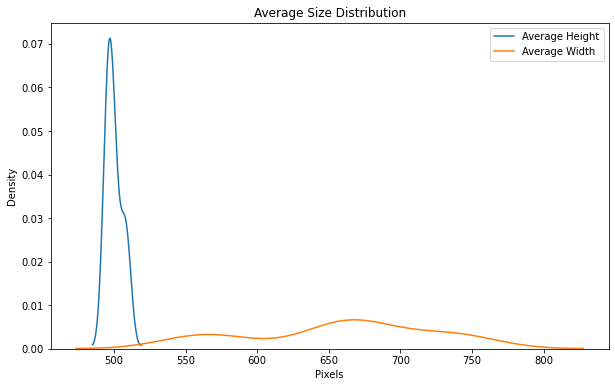

In [17]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    img_dsc['height']['mean'], label='Average Height')
sns.kdeplot(
    img_dsc['width']['mean'], label='Average Width')
plt.xlabel('Pixels')
plt.ylabel('Density')
plt.title('Average Size Distribution')

In [18]:
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, classification_report
import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from keras.models import Sequential, model_from_json
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers import MaxPooling2D,AveragePooling2D, GlobalAveragePooling2D,BatchNormalization
from keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from keras.applications.inception_v3 import InceptionV3
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
%matplotlib inline

Using TensorFlow backend.


In [19]:
# Model parameters
image_size = 64
batch_size = 32
num_classes = 4
epochs = 30

In [20]:
# Baseline Model.
model = Sequential()
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.4))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 256)       7168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 256)       590080    
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 29, 256)       1024      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)      

In [21]:
train_datagen = ImageDataGenerator(validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(traindir,target_size=(image_size, image_size),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(traindir,target_size=(image_size,image_size),
                                                         batch_size=batch_size,
                                                         class_mode='categorical',
                                                         subset='validation') # set as validation data


test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(testdir,target_size=(image_size, image_size),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 66788 images belonging to 4 classes.
Found 16696 images belonging to 4 classes.
Found 968 images belonging to 4 classes.


In [22]:
class_weights = class_weight.compute_class_weight('balanced',
                                                  np.unique(train_generator.classes),
                                                  train_generator.classes)

In [23]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
filepath="/kaggle/output/5layered_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# earlystop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3,verbose = 1,restore_best_weights = True)
callbacks_list = [checkpoint]

In [24]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = train_generator.samples // batch_size,
                              validation_data = validation_generator,
                              validation_steps = validation_generator.samples // batch_size,
                              epochs = epochs, 
                              callbacks=callbacks_list,
                              class_weight=class_weights)

Epoch 1/30
2087/2087 [==============================] - 600s 287ms/step - loss: 0.6877 - accuracy: 0.7522 - val_loss: 1.0449 - val_accuracy: 0.7083
Epoch 2/30
2087/2087 [==============================] - 595s 285ms/step - loss: 0.4271 - accuracy: 0.8538 - val_loss: 0.4312 - val_accuracy: 0.8538
Epoch 3/30
2087/2087 [==============================] - 593s 284ms/step - loss: 0.3625 - accuracy: 0.8768 - val_loss: 0.1251 - val_accuracy: 0.8677
Epoch 4/30
2087/2087 [==============================] - 588s 282ms/step - loss: 0.3135 - accuracy: 0.8956 - val_loss: 0.3296 - val_accuracy: 0.8718
Epoch 5/30
2087/2087 [==============================] - 587s 281ms/step - loss: 0.2727 - accuracy: 0.9094 - val_loss: 0.1826 - val_accuracy: 0.9029
Epoch 6/30
2087/2087 [==============================] - 594s 285ms/step - loss: 0.2380 - accuracy: 0.9225 - val_loss: 0.6240 - val_accuracy: 0.8709
Epoch 7/30
2087/2087 [==============================] - 593s 284ms/step - loss: 0.2074 - accuracy: 0.9323 - val_

In [25]:
# serialize model to JSON
model_json = model.to_json()
with open("model_balanced_cnn5layered.json", "w") as json_file:
    json_file.write(model_json)

In [26]:
score = model.evaluate_generator(test_generator,steps = test_generator.samples // batch_size) 
print("\n\n")
print('Testing Loss:', score[0])
print('Testing accuracy:', score[1])






Testing Loss: 0.06003312021493912
Testing accuracy: 0.971875011920929


In [27]:
def load_test_data(folder):
    """
    Function to load the images and labels.
    """
    Image = []
    Label = []
    
    for folder_name in os.listdir(folder):
        # Reading the labels.
        if not folder_name.startswith('.'):
            if folder_name in ['CNV']:
                label = 0
            elif folder_name in ['DME']:
                label = 1
            elif folder_name in ['DRUSEN']:
                label = 2
            elif folder_name in ['NORMAL']:
                label = 3
            else:
                label = 4
            for image_file_name in tqdm(os.listdir(folder + folder_name)):
                # Reading the images.
                image_file = cv2.imread(folder + folder_name + '/' + image_file_name)
                if image_file is not None:
                    # Converting images into array.
                    image_file = skimage.transform.resize(image_file, (image_size, image_size, 3))
                    image_array = np.asarray(image_file)
                    Image.append(image_array)
                    Label.append(label)
    Image = np.asarray(Image)
    Label = np.asarray(Label)
    return Image,Label

In [28]:
X_test,Y_test= load_test_data(testdir)

100%|██████████| 242/242 [00:08<00:00, 30.13it/s]


In [29]:
pred_datagen = ImageDataGenerator()

pred_generator = pred_datagen.flow_from_directory(testdir,target_size=(image_size, image_size),
                                                  batch_size=1,
                                                  class_mode='categorical',
                                                  shuffle = False)

Found 968 images belonging to 4 classes.


In [30]:

pred_generator.reset()
y_pred = model.predict_generator(pred_generator,steps = 968)
Y_test = pred_generator.classes[pred_generator.index_array]
Y_pred = np.argmax(y_pred, axis=-1)

In [31]:
Y_pred = np.argmax(y_pred,axis = 1)

In [32]:
import pickle
with open('y_pred_baseline_model.pkl','wb') as f:
    pickle.dump(y_pred, f)

In [33]:
print ('Train Accuracy', np.mean(history.history['accuracy']))
print ('Train Loss', np.mean(history.history['loss']))
print ('Validation Accuracy', np.mean(history.history['val_accuracy']))
print ('Validation Loss', np.mean(history.history['val_loss']))

Train Accuracy 0.95284015
Train Loss 0.1407721722939585
Validation Accuracy 0.8813416798909505
Validation Loss 0.46396802440285684


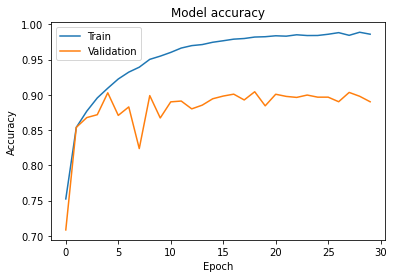

In [34]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

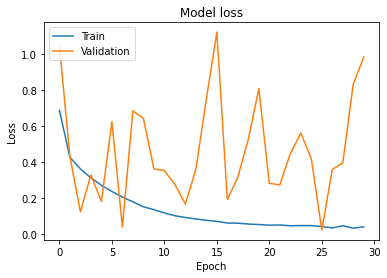

In [35]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

--------------------
| Confusion Matrix |
--------------------

 [[239   3   0   0]
 [  3 233   1   5]
 [ 13   0 228   1]
 [  1   0   0 241]]


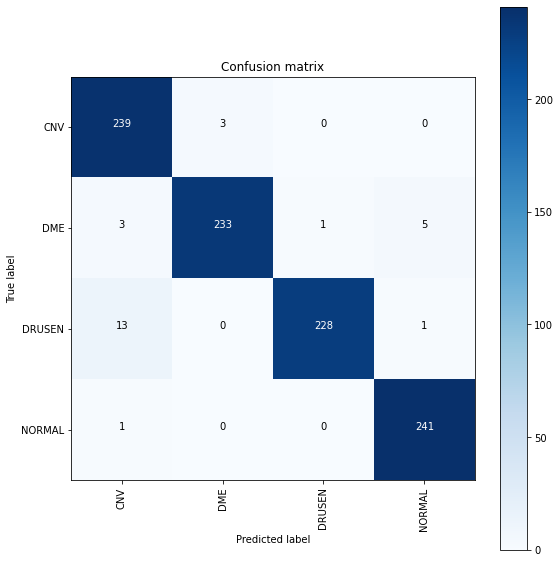

In [37]:
cm = confusion_matrix(Y_test, Y_pred)
 
print('--------------------')
print('| Confusion Matrix |')
print('--------------------')
print('\n {}'.format(cm))
        
# plot confusin matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['CNV','DME','DRUSEN','NORMAL'], normalize=False, 
                      title='Confusion matrix', cmap = plt.cm.Blues)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred,target_names=['CNV','DME','DRUSEN','Normal']))

              precision    recall  f1-score   support

         CNV       0.93      0.99      0.96       242
         DME       0.99      0.96      0.97       242
      DRUSEN       1.00      0.94      0.97       242
      Normal       0.98      1.00      0.99       242

    accuracy                           0.97       968
   macro avg       0.97      0.97      0.97       968
weighted avg       0.97      0.97      0.97       968



In [39]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("Recall/TPR = {}".format(TPR))

# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("Specificity/TNR = {}".format(TNR))

# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision/PPV = {}".format(PPV))

# Negative predictive value
NPV = TN/(TN+FN)
print("Negative Predict Value = {}".format(NPV))

# Fall out or false positive rate
FPR = FP/(FP+TN)
print("False Positive Rate = {}".format(FPR))

# False negative rate
FNR = FN/(TP+FN)
print("False Negative Rate = {}".format(FNR))

# False discovery rate
FDR = FP/(TP+FP)
print("False discovery rate = {}".format(FDR))

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Overall Accuracy = {}".format(ACC))

Recall/TPR = [0.98760331 0.96280992 0.94214876 0.99586777]
Specificity/TNR = [0.97658402 0.99586777 0.99862259 0.99173554]
Precision/PPV = [0.93359375 0.98728814 0.99563319 0.9757085 ]
Negative Predict Value = [0.99578652 0.98770492 0.98105548 0.99861304]
False Positive Rate = [0.02341598 0.00413223 0.00137741 0.00826446]
False Negative Rate = [0.01239669 0.03719008 0.05785124 0.00413223]
False discovery rate = [0.06640625 0.01271186 0.00436681 0.0242915 ]
Overall Accuracy = [0.97933884 0.98760331 0.98450413 0.9927686 ]


**Layer Visualization**

In [40]:
import numpy as np   
from keras.preprocessing import image    
im1_path="../input/kermany2018/OCT2017 /test/DME/DME-15208-2.jpeg"
test_image=image.load_img(im1_path,target_size=(64,64))

12288


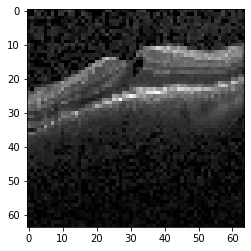

In [41]:
import matplotlib.pyplot as plt
plt.imshow(test_image)
# now to convert to 3 dimensional from 2d
test_image=image.img_to_array(test_image)
print(test_image.size)

In [42]:
def get_name_layer_filters(model):
    filter_whole=[]
    layer_whole=[]
    for layer in model.layers:
        if 'conv' not in layer.name:
            continue
        filters,biases=layer.get_weights()
        filter_whole.append(filters)
        layer_whole.append(biases)
        print(layer.name,filters.shape)
    return filter_whole,layer_whole    
        

In [43]:
filter_whole,layer_whole=get_name_layer_filters(model)

conv2d_1 (3, 3, 3, 256)
conv2d_2 (3, 3, 256, 256)
conv2d_3 (3, 3, 256, 128)
conv2d_4 (3, 3, 128, 64)
conv2d_5 (3, 3, 64, 32)


In [44]:
filters,biases=model.layers[0].get_weights()

In [45]:
f_min,f_max=filters.min(),filters.max()
filters=(filters-f_min)/(f_max-f_min)

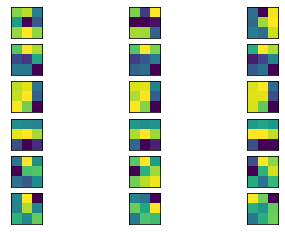

In [46]:
from matplotlib import pyplot
n_filters,ix=6,1
for i in range(n_filters):
    f=filters[:,:,:,i]
    #Plot each channel
    for j in range(3):
        ax=pyplot.subplot(n_filters,3,ix)
        ax.set_xticks([])
        ax.set_yticks([])
        #Plot filter channel
        pyplot.imshow(f[:,:,j])
        ix+=1
        
pyplot.show() 

Starting with the plotting

Making a model from feature map.We will start with making a model with outputs from 1st convolution layer of model and input from model.

In [47]:
from keras.models import Model
model_feature=Model(inputs=model.inputs,outputs=model.layers[4].output)

In [48]:
test_image = np.expand_dims(test_image, axis=0)
feature_map=model_feature.predict(test_image)

In [49]:
feature_map.shape

(1, 29, 29, 256)

32 feature maps will be plotted. We will try to analyze these maps and interpret them in a useful way after plotting them.

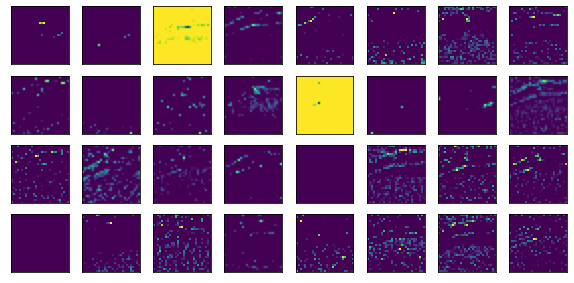

In [50]:
pyplot.figure(figsize=(10,10))        
        
square=8
ix=1
for _ in range(4):
    for _ in range(8):
        ax=pyplot.subplot(square,square,ix)
        ax.set_xticks([])
        ax.set_yticks([])
        pyplot.imshow(feature_map[0,:,:,ix-1])
        ix+=1
        
pyplot.show()

Now implementing above feature map plotting for all convolution layer.

In [51]:
def get_convolutional_layers(model):
    convolutions_models=[]
    for layer in model.layers:
        if 'conv2d' not in layer.name:
            continue
        model_temp=Model(inputs=model.inputs,outputs=layer.output)
        convolutions_models.append(model_temp)
    return convolutions_models    
        

This function returns feature maps and models list

In [52]:
def generate_feature_maps(model,test_image):
    models=get_convolutional_layers(model)#Fetching convolution layers models
    feature_maps=[]
    
    for model_temp in models:
        feature_map=model_feature.predict(test_image)
        feature_maps.append(feature_map)
    return feature_maps,models   

In [53]:
def plot_graph(feature_map):
    
    #plot all 32 maps in an 8*4 squares
    pyplot.figure(figsize=(30,30))        
        
    square=8
    ix=1
    for _ in range(4):
        for _ in range(8):
            ax=pyplot.subplot(square,square,ix)
            ax.set_xticks([])
            ax.set_yticks([])
            pyplot.imshow(feature_map[0,:,:,ix-1])
            ix+=1
        
    pyplot.show()

In [54]:
def plots_generator(model):
    print("IMAGE UNDER CONSIDERATION")
    test_image=image.load_img(im1_path,target_size=(64,64))
    plt.imshow(test_image)
    test_image=image.img_to_array(test_image)

    test_image= np.expand_dims(test_image,axis=0)
    print()
    feature_maps,models=generate_feature_maps(model,test_image)
    #ax=pyplot.subplot(square,square,ix)# only 32 filters will be shown of each layer
    counter=1
    for each_map in feature_maps:
        print("Convolutional Layer Number {} ".format(counter))
        counter+=1
        #ax=pyplot.subplot(square,square,ix)
        plot_graph(each_map)

IMAGE UNDER CONSIDERATION

Convolutional Layer Number 1 


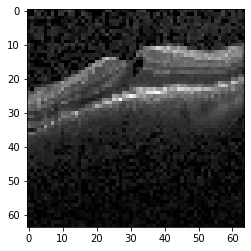

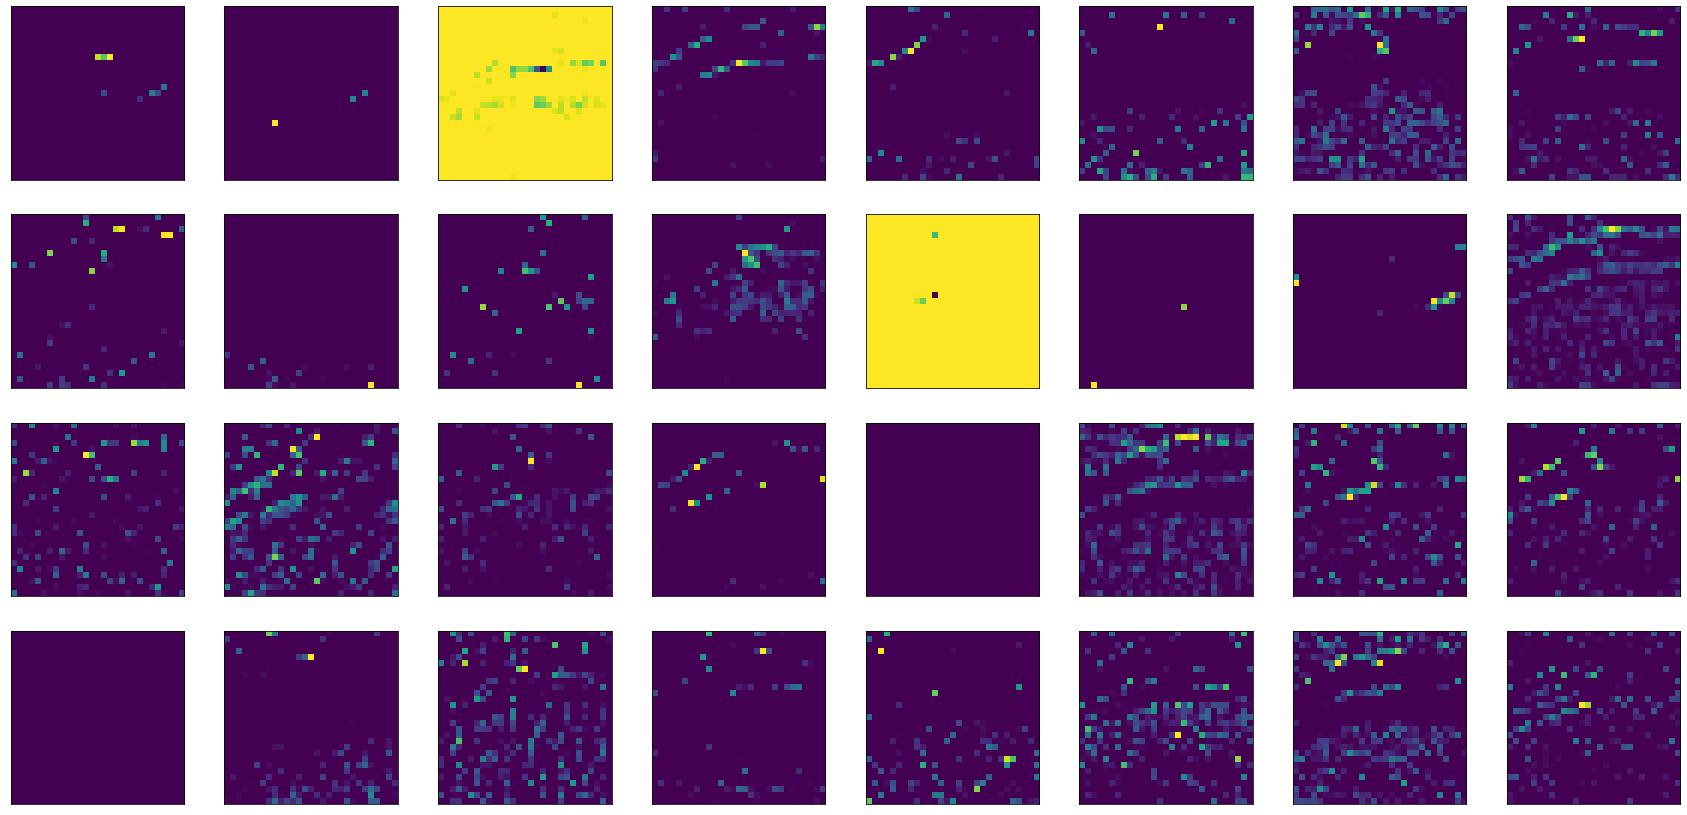

Convolutional Layer Number 2 


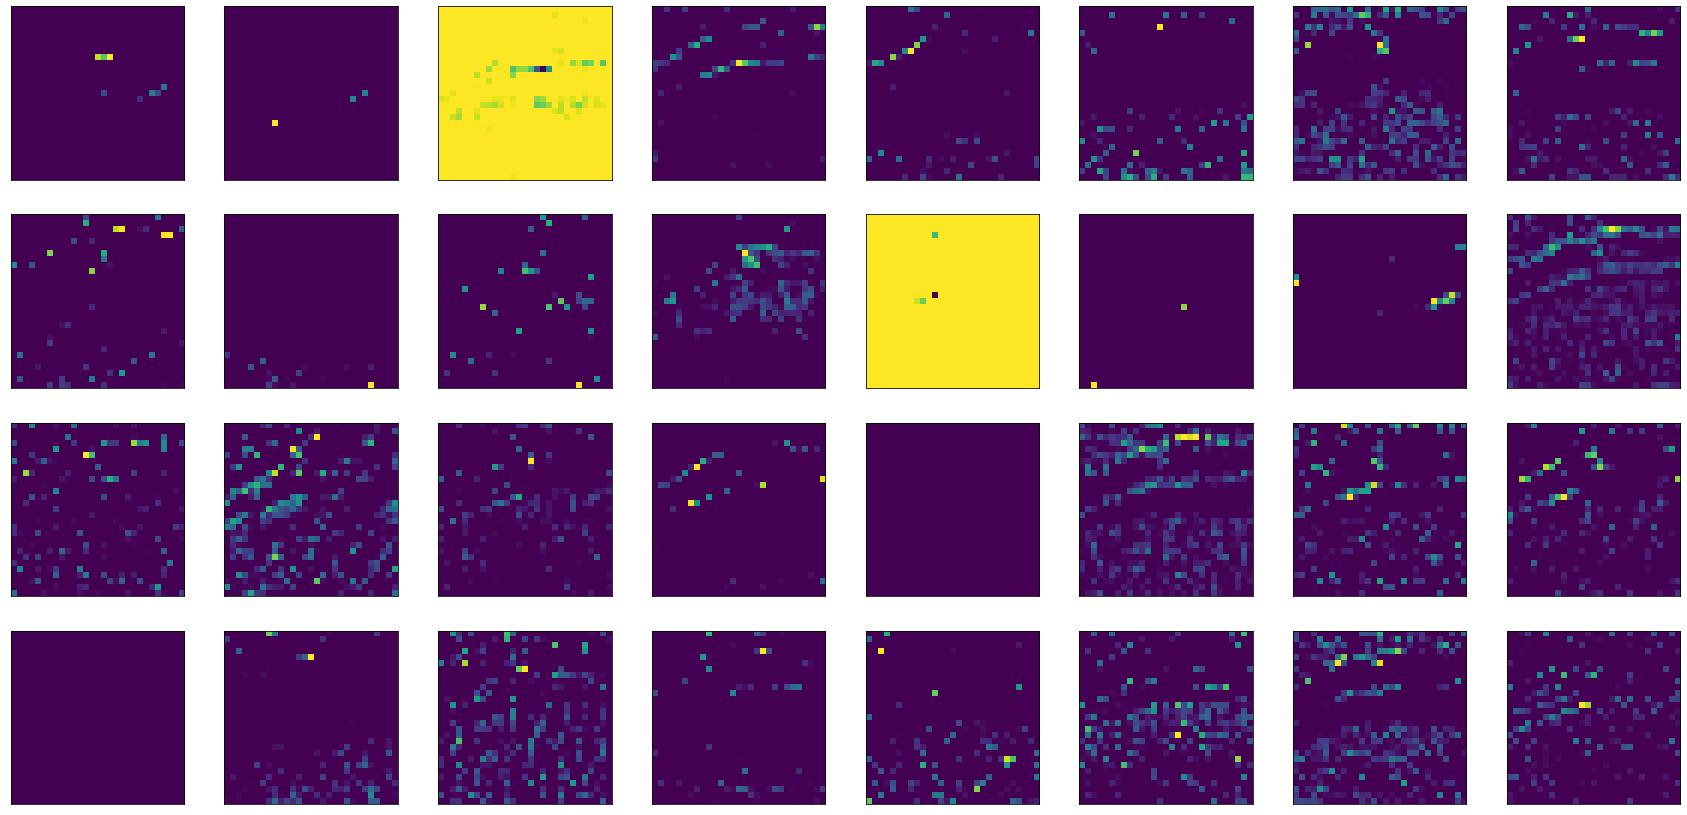

Convolutional Layer Number 3 


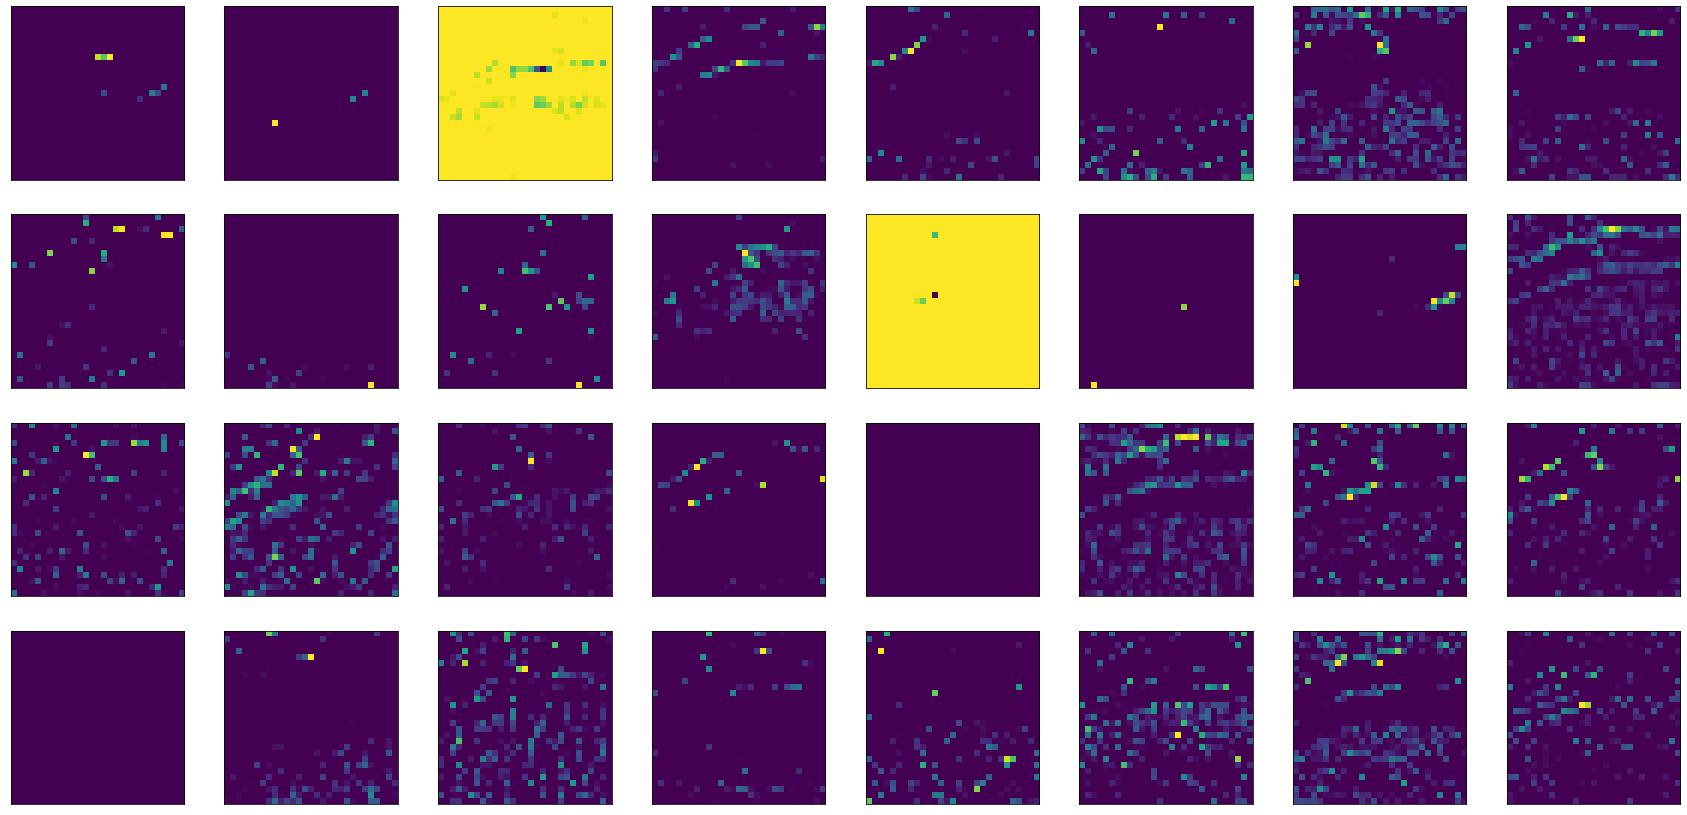

Convolutional Layer Number 4 


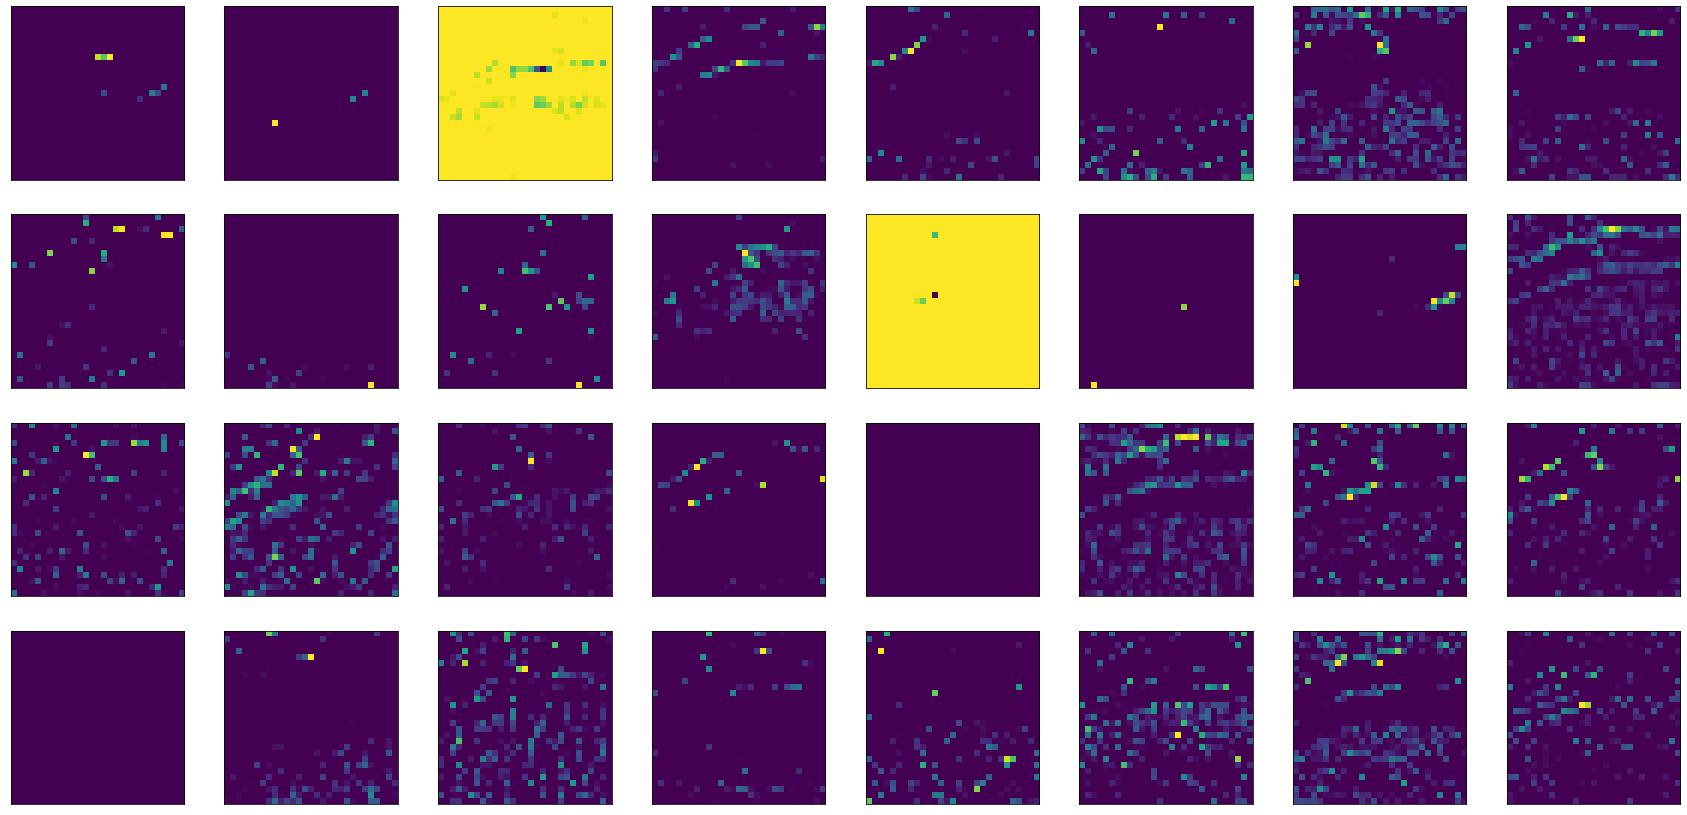

Convolutional Layer Number 5 


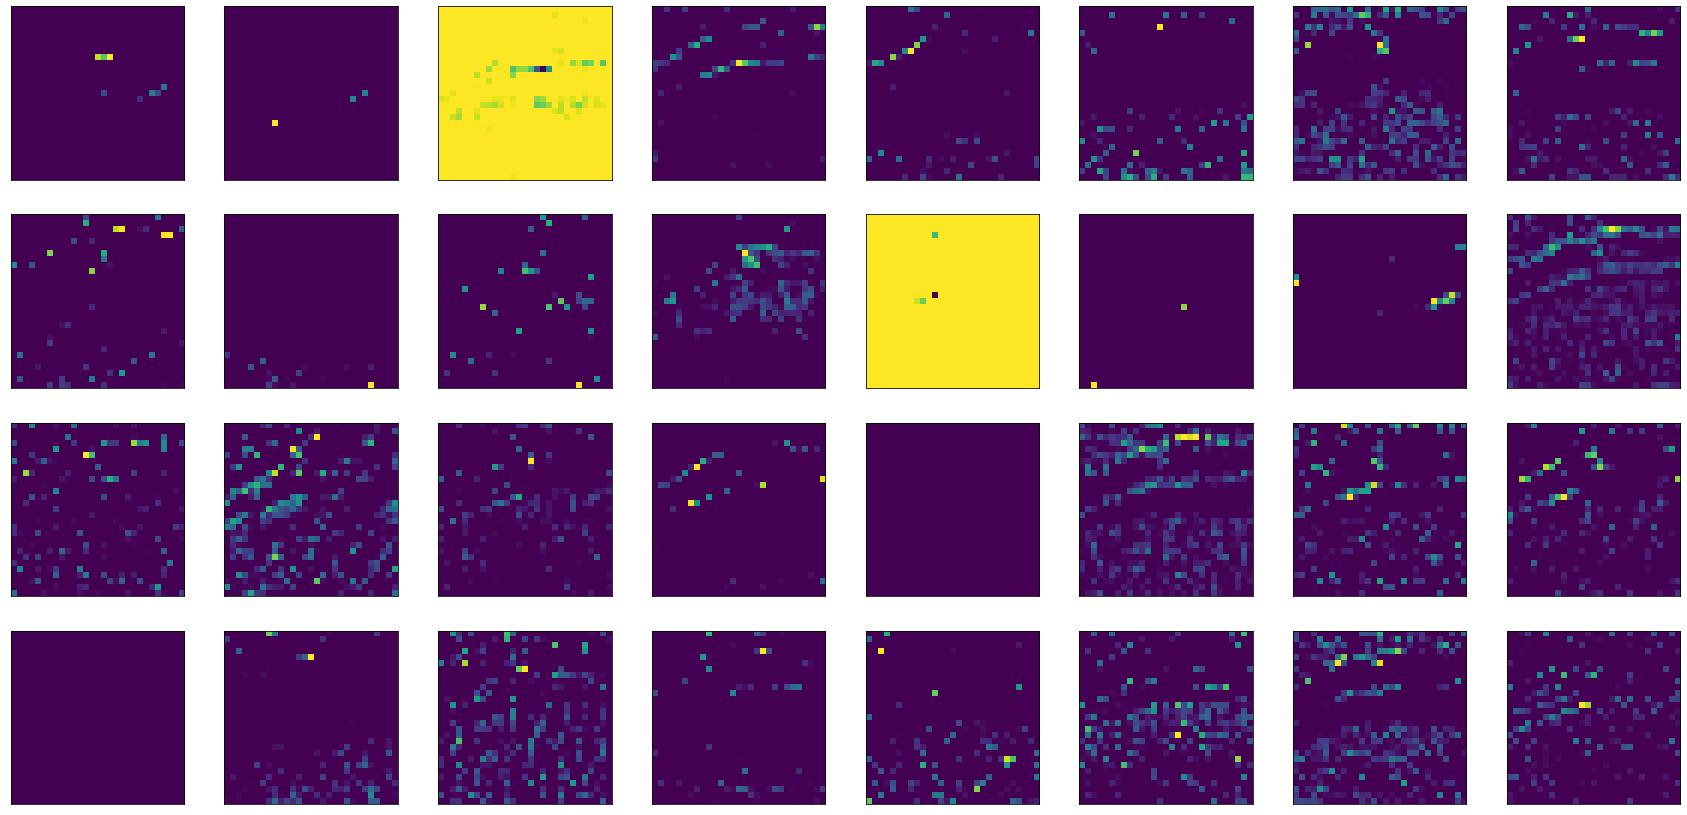

In [55]:
plots_generator(model)